In [3]:
import numpy as np 
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
raw_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Best%20Data%20Science%20Courses%20-%20Udemy/udemy.csv", encoding='cp1252')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         160 non-null    object 
 1   price        160 non-null    object 
 2   description  160 non-null    object 
 3   host         160 non-null    object 
 4   rating       160 non-null    float64
 5   duration     160 non-null    object 
 6   lectures     160 non-null    object 
 7   level        160 non-null    object 
 8   url          160 non-null    object 
dtypes: float64(1), object(8)
memory usage: 11.4+ KB


In [6]:
len((raw_data['name'] + raw_data['host']).unique())

160

In [7]:
raw_data["name"].str.len().sort_values(ascending=True)

6      21
64     23
44     23
121    25
2      28
       ..
54     60
128    60
129    60
49     60
159    60
Name: name, Length: 160, dtype: int64

In [8]:
raw_data["price"].value_counts()

455      137
618        7
566        6
1,920      4
468        2
819        1
585        1
6,400      1
2,560      1
Name: price, dtype: int64

In [9]:
raw_data['price'] = raw_data['price'].apply(lambda x: float(x.replace(',','')))

Text(0.5, 1.0, 'Udemy Data science course price - bar plot')

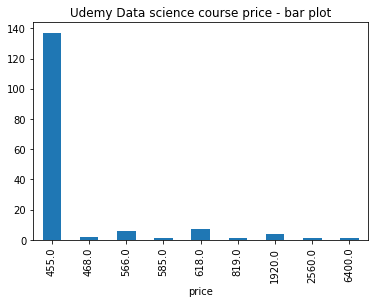

In [10]:
raw_data.groupby('price')['name'].count().plot(kind='bar')
plt.title('Udemy Data science course price - bar plot')

(0.0, 1500.0)

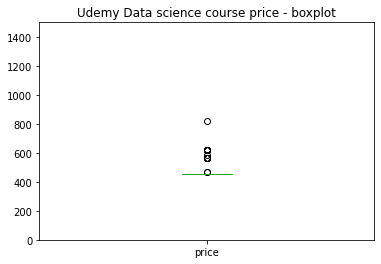

In [11]:
raw_data['price'].plot(kind='box')
plt.title('Udemy Data science course price - boxplot')
plt.ylim(0,1500)

Text(0, 0.5, 'Course level')

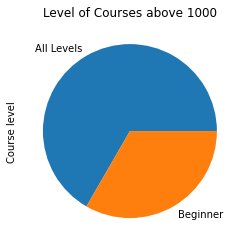

In [12]:
raw_data.query('price > 1000').groupby('level')['name'].count().plot(kind='pie')
plt.title('Level of Courses above 1000')
plt.ylabel('Course level')

Text(0.5, 1.0, 'Duration of Courses above 1000')

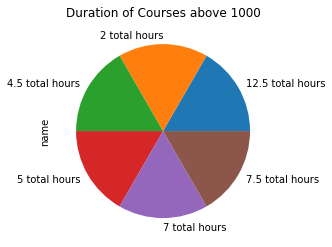

In [13]:
raw_data.query('price > 1000').groupby('duration')['name'].count().plot(kind='pie')
plt.title('Duration of Courses above 1000')

In [14]:
raw_data = raw_data.query("price < 1000")

In [15]:
raw_data["description"].str.len().sort_values(ascending=True)

121     28
69      32
14      33
145     34
64      39
      ... 
129    120
128    120
75     120
117    120
104    120
Name: description, Length: 154, dtype: int64

In [16]:
raw_data[raw_data['host'].apply(lambda x: len(x) <= 10)]['host']

0       Pradeep D
14      Sahla Ali
15     Shan Singh
17      Pradeep D
19     Dev Nirwal
22        AI 4 MY
31        Srini E
33      Ajay Tech
34      Jay Bhatt
35      MrBriit .
36     Shan Singh
40      Up Degree
55        Srini E
56      Up Degree
61     Loony Corn
62     Laxmi Kant
66        Srini E
83     Ram Prasad
114    Chris Levy
120    Shan Singh
154        Dan We
Name: host, dtype: object

Text(0.5, 1.0, 'Most productive hosts')

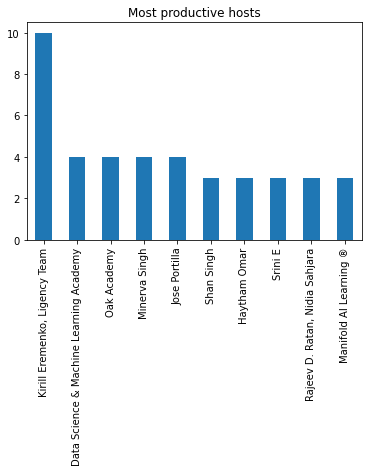

In [17]:
raw_data['host'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Most productive hosts')

<AxesSubplot:>

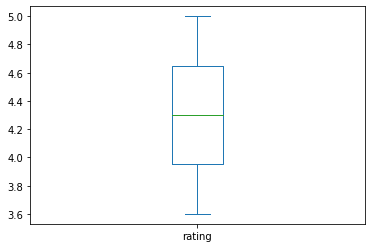

In [18]:
raw_data.groupby('rating')['name'].count().reset_index().plot(kind='box', y='rating')

(0.0, 12000.0)

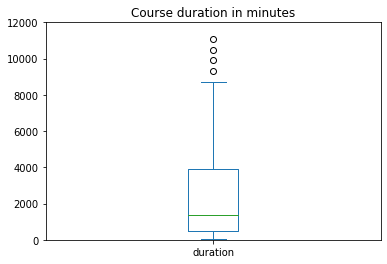

In [19]:
def return_minutes(duration_string):
    if "mins" in duration_string:
        return int(''.join([x for x in duration_string if x.isdigit()]))
    else:
        return int(''.join([x for x in duration_string if x.isdigit()]))*60
raw_data['duration'] = raw_data['duration'].apply(return_minutes)
raw_data['duration'].plot(kind= 'box')
plt.title('Course duration in minutes')
plt.ylim(0, 12000)

In [20]:
duration_q25 = raw_data['duration'].quantile(.25)
duration_q75 = raw_data['duration'].quantile(.75)
print(f"Most duration observations locate between {int(duration_q25/60)} and {int(duration_q75/60)} hours.")

Most duration observations locate between 8 and 65 hours.


In [21]:
def return_lectures(lectures_string):
    return int(''.join([x for x in lectures_string if x.isdigit()]))

In [22]:
raw_data["lectures"] = raw_data['lectures'].apply(return_lectures)

<AxesSubplot:>

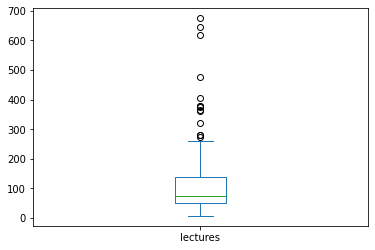

In [23]:
raw_data['lectures'].plot(kind='box')

In [24]:
lectures_q25 = raw_data['lectures'].quantile(.25)
lectures_q75 = raw_data['lectures'].quantile(.75)
print(f"Most lectures observations locate between {int(lectures_q25)} and {int(lectures_q75)} lectures.")

Most lectures observations locate between 49 and 137 lectures.


Text(0.5, 1.0, 'Course level')

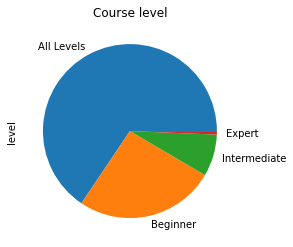

In [25]:
raw_data['level'].value_counts().plot(kind='pie')
plt.title('Course level')

In [26]:
data = raw_data

In [27]:
data.groupby('level').agg({'name':'count','price':'median', 'duration':'median', 'rating':'median', 'lectures':'median'})

,name,price,duration,rating,lectures
level,,,,,
All Levels,101,455.0,1740.0,4.50,108.0
Beginner,40,455.0,1500.0,4.50,56.5
Expert,1,455.0,540.0,4.80,73.0
Intermediate,12,455.0,570.0,4.45,58.0
